# Mercado de Autos: Asistencia al vendedor

## Preguntas de Interés:

### Preguntas Principales:

* Que características hacen que mi auto pierda valor?
    * Año?
    * Kilómetros?
    * Si tuvo daños?
    * Si el vendedor es primer propietario?
* Que características son más comunes en los autos en venta? 

### Preguntas Generales:

* Cuáles son los autos más publicados?
* Cuáles son los más valorados por las personas?
    * Y por los vendedores?
        * Hay algo que haga que algunas marcas sean más valorados que otros?

## Explicación de variables:

1. Marca: Nombre del fabricante del coche
2. Modelo: Nombre del modelo del coche
3. Año: El año en que se fabricó el coche
4. Kilómetros: La cantidad de kilómetros que ha recorrido el coche desde su producción
5. Motor: Capacidad del motor
6. Transmisión: Tipo de transmisión del coche
7. Tracción: Tipo de transmisión del coche
8. Combustible: Tipo de combustible que consume el coche
9. Color: Color exterior del coche
10. DañosoAccidentes: Si el coche estuvo involucrado en accidentes
11. PrimerPropietario: Si el coche era propiedad de una sola persona
12. UsoPersonal: Si el coche se utilizó solo para fines personales
13. Vendedor: Nombre del vendedor
14. PuntajeVendedor: Calificación del vendedor
15. PuntajeConductores: Calificación del coche dada por los conductores
16. N_Reviews: La cantidad de reseñas del coche dejadas por los conductores
17. Precio: Precio del coche

## Carga de la base de datos:

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud

In [ ]:
data = pd.read_csv('Mercado_Autos_Usados_USA.csv')

sns.set(style="darkgrid")

data

In [ ]:
data.info()

## Limpieza:

* La base de datos fue reutilizada de un proyecto anterior, por lo tanto el proceso de limpieza ya fue hecho.
    * El proceso fue así, el dataset original contaba con 762,091 filas, las cuales fueron reducidas a 39401, 
eliminando todas las filas    que contenían nulos, ya que la dimensión de dataset era mucha y a la hora de realizar las visualizaciones.

In [ ]:
data.isna().sum()

## Análisis Exploratorio:

### Análisis de metadata:

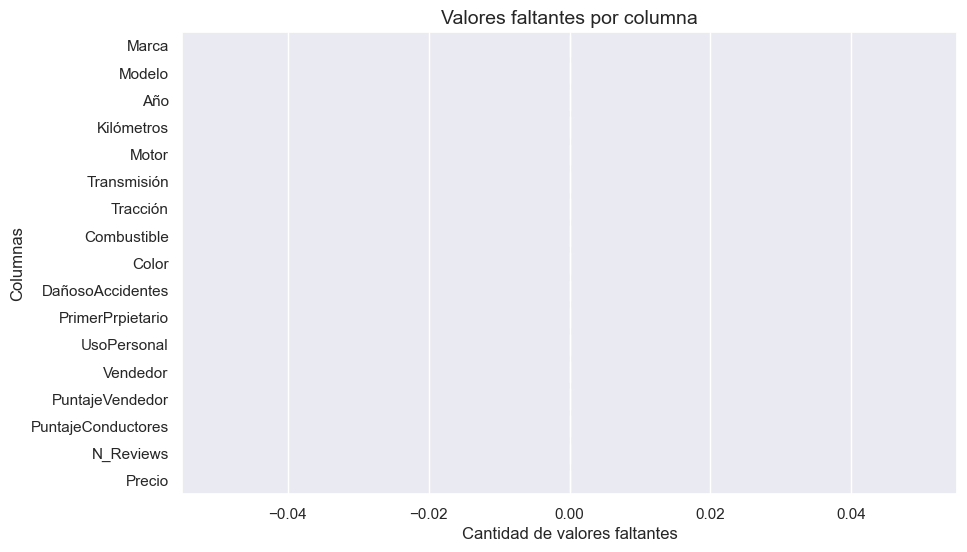

In [107]:
missing_values = data.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index)
plt.title("Valores faltantes por columna", fontsize=14)
plt.xlabel("Cantidad de valores faltantes")
plt.ylabel("Columnas")
plt.show()

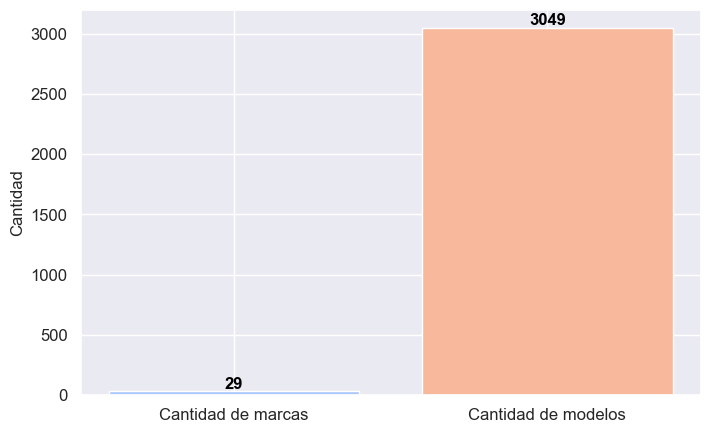

In [138]:
num_marcas = data["Marca"].nunique()
num_modelos = data["Modelo"].nunique()
stats = ["Cantidad de marcas", "Cantidad de modelos"]
values = [num_marcas, num_modelos]

plt.figure(figsize=(8, 5))
bars = plt.bar(stats, values, color=sns.color_palette("coolwarm", len(stats)))
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), 
             ha="center", va="bottom", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Cantidad")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Axes: xlabel='Año'>

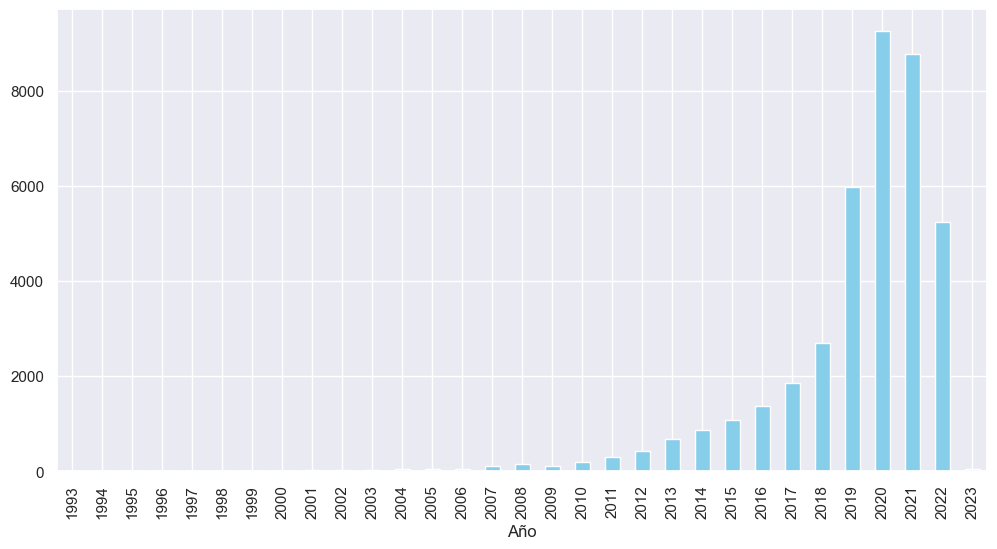

In [116]:
data['Año'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), color='skyblue')

In [141]:
data_2020 = data[(data['Año'] == 2020)]
porcentaje = (len(data_2020) / len(data)) * 100
print(f"{porcentaje:.2f}%")

data_2020 = data[(data['Año'] == 2020)]
cantidad = (len(data_2020))
print(f"{cantidad}")

23.46%
9245


In [143]:
data_2021 = data[(data['Año'] == 2021)]
porcentaje = (len(data_2021) / len(data)) * 100
print(f"{porcentaje:.2f}%")

data_2021 = data[(data['Año'] == 2021)]
cantidad = (len(data_2021))
print(f"{cantidad}")

22.26%
8770


In [137]:
cantidad_datos = data.columns.value_counts().sum() * data.shape[0]
print(cantidad_datos)

669817


### Preguntas Principales:

#### 1- Año:

C:\Users\ema04\AppData\Local\Temp\ipykernel_2112\2718946724.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Año", y="Precio", palette="viridis", showfliers = False)


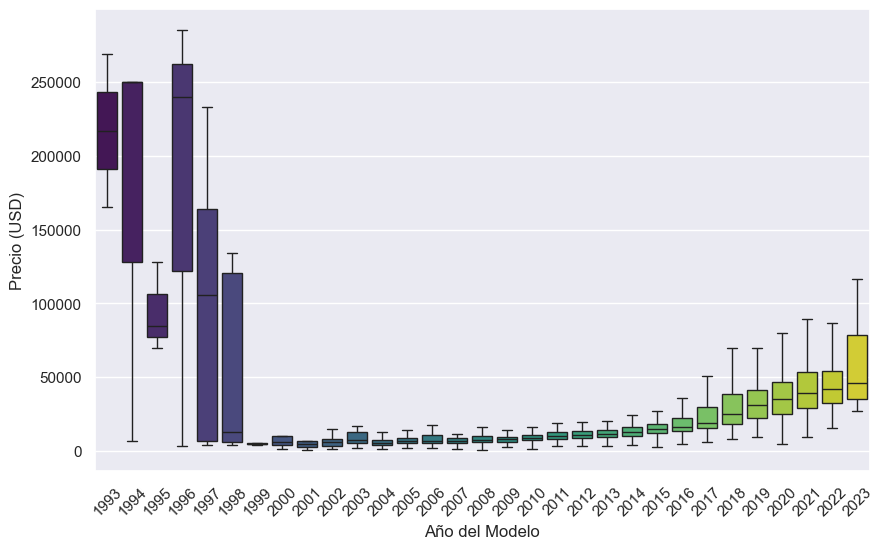

In [185]:
# -----------------------------
# Análisis: Año y valor del auto
# -----------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Año", y="Precio", palette="viridis", showfliers = False)
plt.xticks(rotation=45)
plt.ylabel("Precio (USD)")
plt.xlabel("Año del Modelo")
plt.show()


C:\Users\ema04\AppData\Local\Temp\ipykernel_2112\946582559.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='Precio', data=año1993_1998, palette="viridis", errorbar=None)


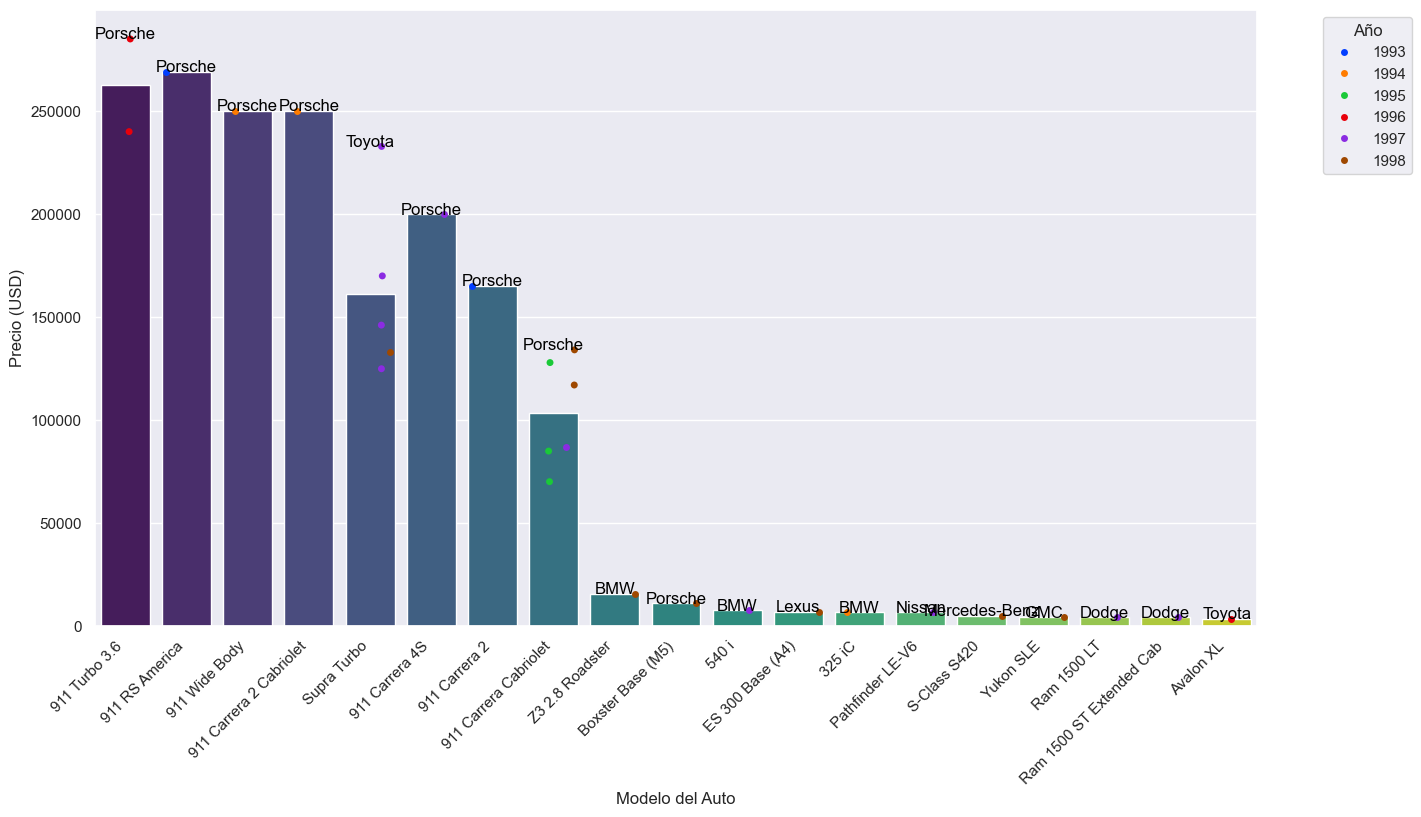

In [ ]:

plt.figure(figsize=(15, 8))
año1993_1998 = data[(data['Año'] >= 1993) & (data['Año'] <= 1998)]
sns.barplot(x='Modelo', y='Precio', data=año1993_1998, palette="viridis", errorbar=None)    
sns.stripplot(x='Modelo', y='Precio', data=año1993_1998, hue='Año', palette="bright" ,dodge=True)

for i, modelo in enumerate(año1993_1998['Modelo'].unique()):
    marca = año1993_1998[año1993_1998['Modelo'] == modelo]['Marca'].iloc[0]
    plt.text(i, año1993_1998[año1993_1998['Modelo'] == modelo]['Precio'].max(), marca, 
             horizontalalignment='center', size='medium', color='black')   
    
plt.xticks(rotation=45, ha='right')
plt.ylabel("Precio (USD)")
plt.xlabel("Modelo del Auto")
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')


In [157]:
año1993_1998['Modelo']

36                  911 Turbo 3.6
68                 911 RS America
94                  911 Wide Body
95        911 Carrera 2 Cabriolet
111                 911 Turbo 3.6
122                   Supra Turbo
175                911 Carrera 4S
286                   Supra Turbo
313                 911 Carrera 2
417                   Supra Turbo
517         911 Carrera Cabriolet
535                   Supra Turbo
576         911 Carrera Cabriolet
613                   Supra Turbo
722         911 Carrera Cabriolet
1724        911 Carrera Cabriolet
1867        911 Carrera Cabriolet
3284        911 Carrera Cabriolet
34663             Z3 2.8 Roadster
37441           Boxster Base (M5)
38787                       540 i
38993            ES 300 Base (A4)
39016                      325 iC
39027            Pathfinder LE-V6
39251                S-Class S420
39312                   Yukon SLE
39318                 Ram 1500 LT
39322    Ram 1500 ST Extended Cab
39351                   Avalon XL
Name: Modelo, 

#### 2- Kilómetros:

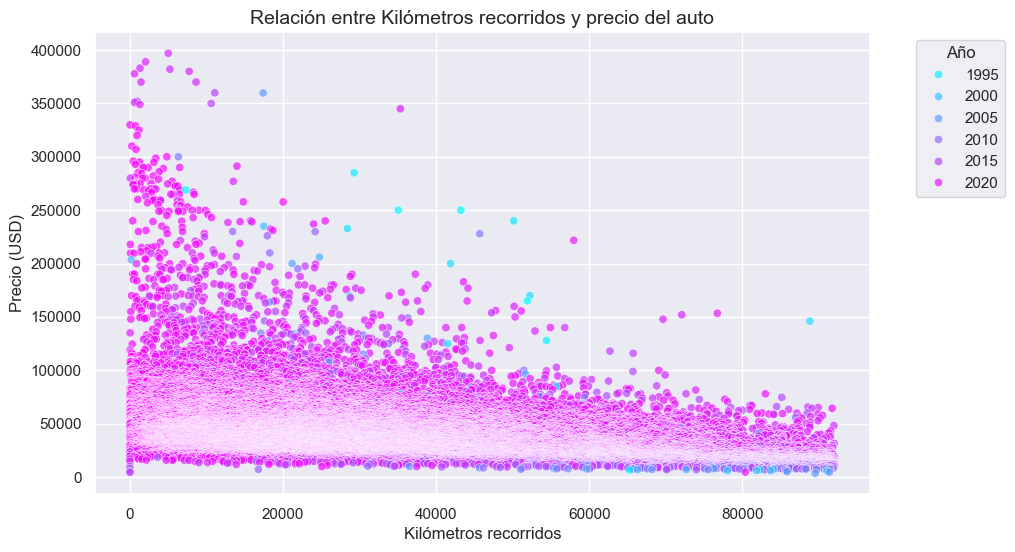

In [89]:
# -----------------------------
# Análisis: Kilómetros y valor del auto
# -----------------------------
Reduccion = data['Kilómetros'].quantile(0.9)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data[(data['Kilómetros']<Reduccion)], x="Kilómetros", y="Precio", hue="Año", palette="cool", alpha=0.7)
plt.title("Relación entre Kilómetros recorridos y precio del auto", fontsize=14)
plt.ylabel("Precio (USD)")
plt.xlabel("Kilómetros recorridos")
plt.legend(title="Año", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


#### 3- Daños:

C:\Users\ema04\AppData\Local\Temp\ipykernel_2112\4173538536.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="DañosoAccidentes", y="Precio", palette="Set2", showfliers = False)


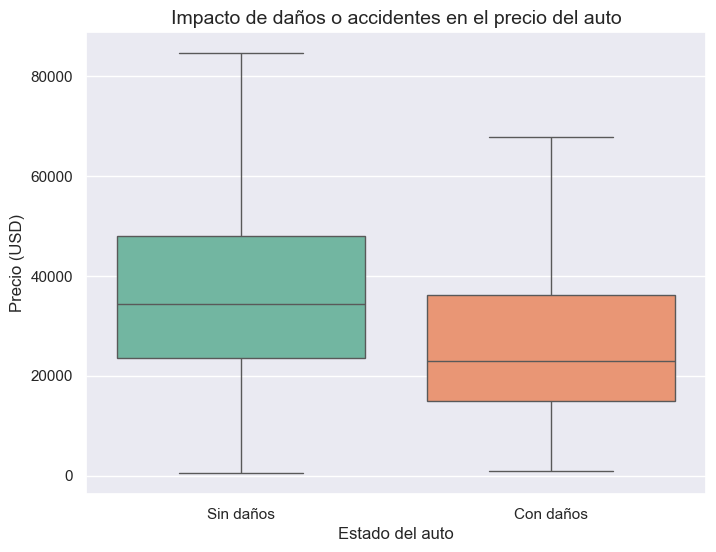

In [90]:
# -----------------------------
# Análisis: Daños o accidentes
# -----------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="DañosoAccidentes", y="Precio", palette="Set2", showfliers = False)
plt.title("Impacto de daños o accidentes en el precio del auto", fontsize=14)
plt.xticks([0, 1], ["Sin daños", "Con daños"])
plt.ylabel("Precio (USD)")
plt.xlabel("Estado del auto")
plt.show()


#### 4- Primer propietario:

C:\Users\ema04\AppData\Local\Temp\ipykernel_2112\1665030959.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="PrimerPrpietario", y="Precio", palette="Set1", showfliers = False)


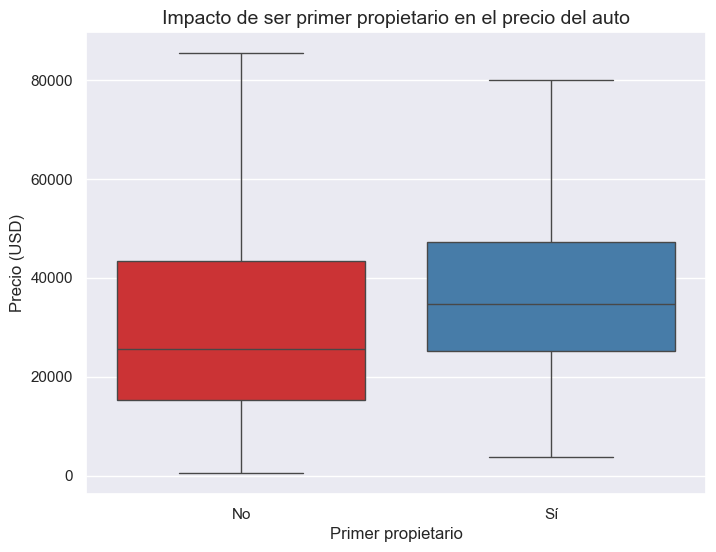

In [ ]:
# -----------------------------
# Análisis: Primer propietario
# -----------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="PrimerPrpietario", y="Precio", palette="Set1", showfliers = False)
plt.title("Impacto de ser primer propietario en el precio del auto", fontsize=14)
plt.xticks([0, 1], ["No", "Sí"])
plt.ylabel("Precio (USD)")
plt.xlabel("Primer propietario")
plt.show()


### Preguntas Generales:

#### 1- Marcas más publicados:

C:\Users\ema04\AppData\Local\Temp\ipykernel_2112\4137971146.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.values, y=top_models.index, palette="coolwarm")


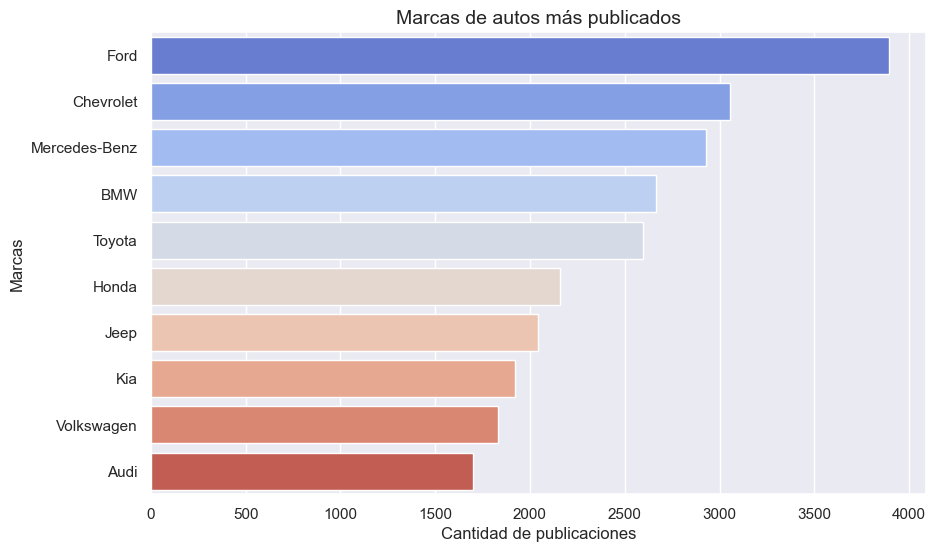

In [91]:
# -----------------------------
# Análisis: Marcas más publicados
# -----------------------------
plt.figure(figsize=(10, 6))
top_models = data["Marca"].value_counts().head(10)
sns.barplot(x=top_models.values, y=top_models.index, palette="coolwarm")
plt.title("Marcas de autos más publicados", fontsize=14)
plt.xlabel("Cantidad de publicaciones")
plt.ylabel("Marcas")
plt.show()


In [144]:
text1 = " ".join(Marca for Marca in data.Marca)

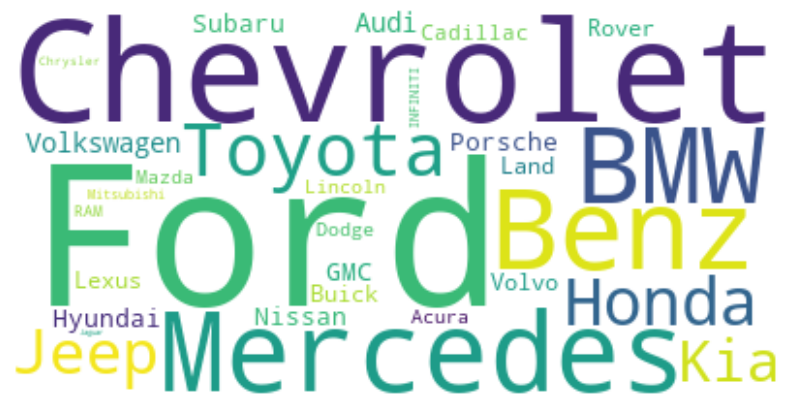

In [147]:
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text1)
plt.figure(figsize = (10,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 2.a- Más valorados por personas

C:\Users\ema04\AppData\Local\Temp\ipykernel_2112\4091529586.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_by_users.values, y=top_rated_by_users.index, palette="viridis")


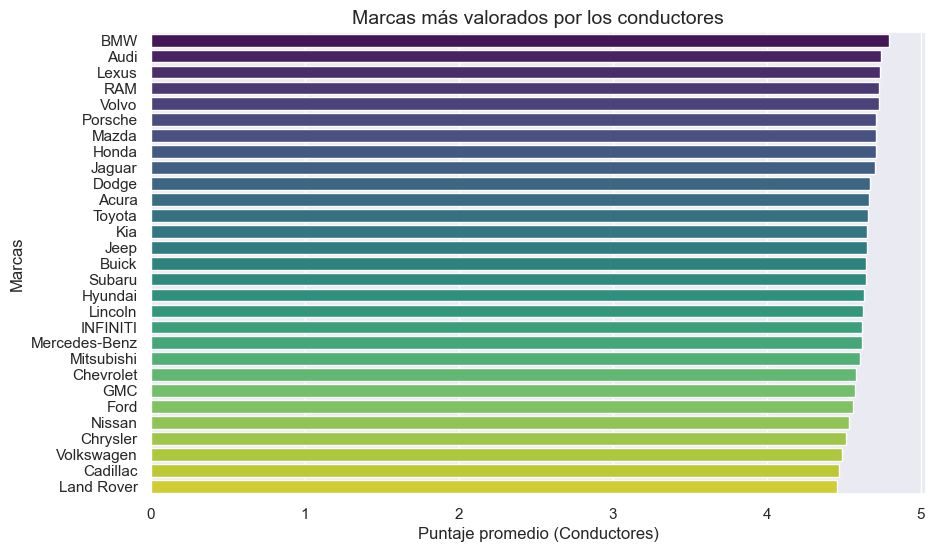

In [149]:
# -----------------------------
# Análisis: Autos más valorados por las personas
# -----------------------------
plt.figure(figsize=(10, 6))
top_rated_by_users = data.groupby("Marca")["PuntajeConductores"].mean().sort_values(ascending=False)
sns.barplot(x=top_rated_by_users.values, y=top_rated_by_users.index, palette="viridis")
plt.title("Marcas más valorados por los conductores", fontsize=14)
plt.xlabel("Puntaje promedio (Conductores)")
plt.ylabel("Marcas")
plt.show()

#### 2.b- Vendedores menos valorados:

C:\Users\ema04\AppData\Local\Temp\ipykernel_2112\802787699.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=puntajeven.values, y=puntajeven.index, palette="viridis")


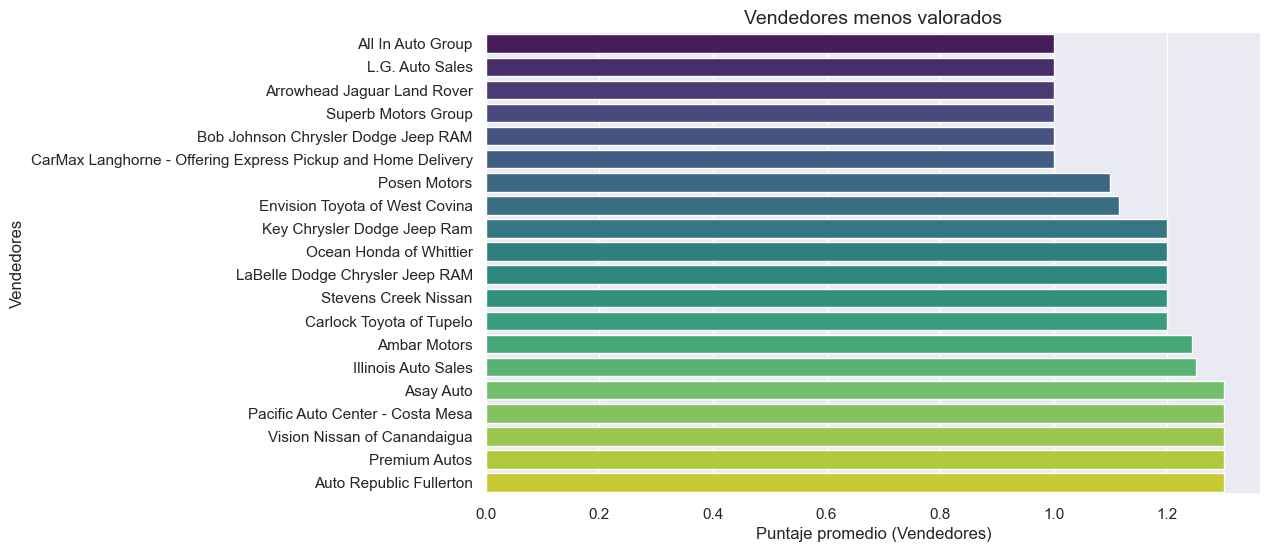

In [96]:
# -----------------------------
# Análisis: Vendedores menos valorados
# -----------------------------
plt.figure(figsize=(10, 6))
puntajeven = data.groupby("Vendedor")["PuntajeVendedor"].mean().sort_values(ascending=True).head(20)
sns.barplot( x=puntajeven.values, y=puntajeven.index, palette="viridis")
plt.title("Vendedores menos valorados", fontsize=14)
plt.xlabel("Puntaje promedio (Vendedores)")
plt.ylabel("Vendedores")
plt.show()

##### 2.b- Porqué son tan poco valorados?

C:\Users\ema04\AppData\Local\Temp\ipykernel_2112\407472072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendedores_con_danados.values, y=vendedores_con_danados.index, palette="viridis", errorbar=None)


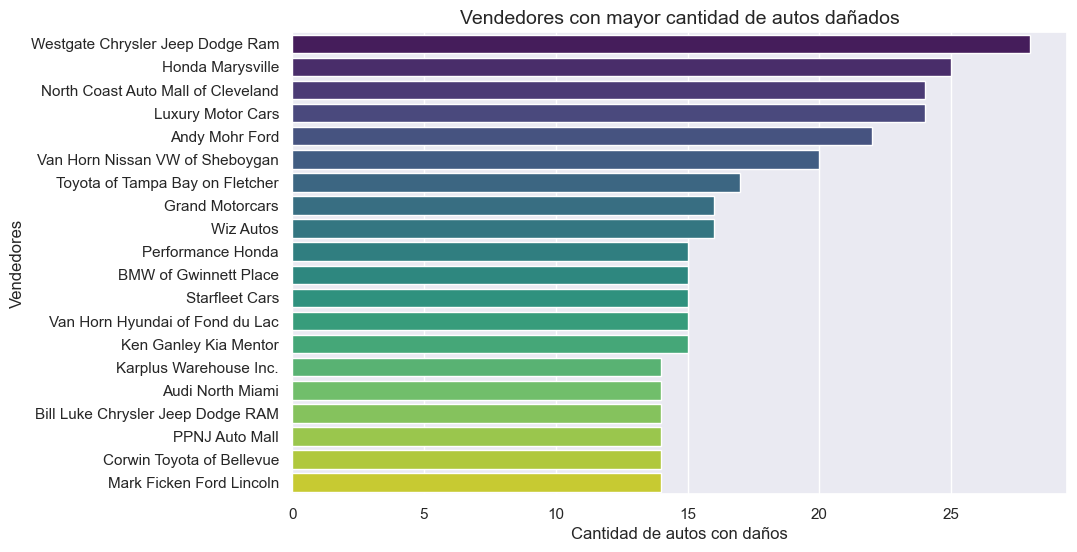

In [97]:
plt.figure(figsize=(10, 6))
autos_danados = data[data["DañosoAccidentes"] == 1]
vendedores_con_danados = autos_danados["Vendedor"].value_counts().head(20)
sns.barplot(x=vendedores_con_danados.values, y=vendedores_con_danados.index, palette="viridis", errorbar=None)
plt.title("Vendedores con mayor cantidad de autos dañados", fontsize=14)
plt.xlabel("Cantidad de autos con daños")
plt.ylabel("Vendedores")
plt.show()

C:\Users\ema04\AppData\Local\Temp\ipykernel_2112\2376428048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendedores_con_danados.values, y=vendedores_con_danados.index, palette="viridis", errorbar=None)


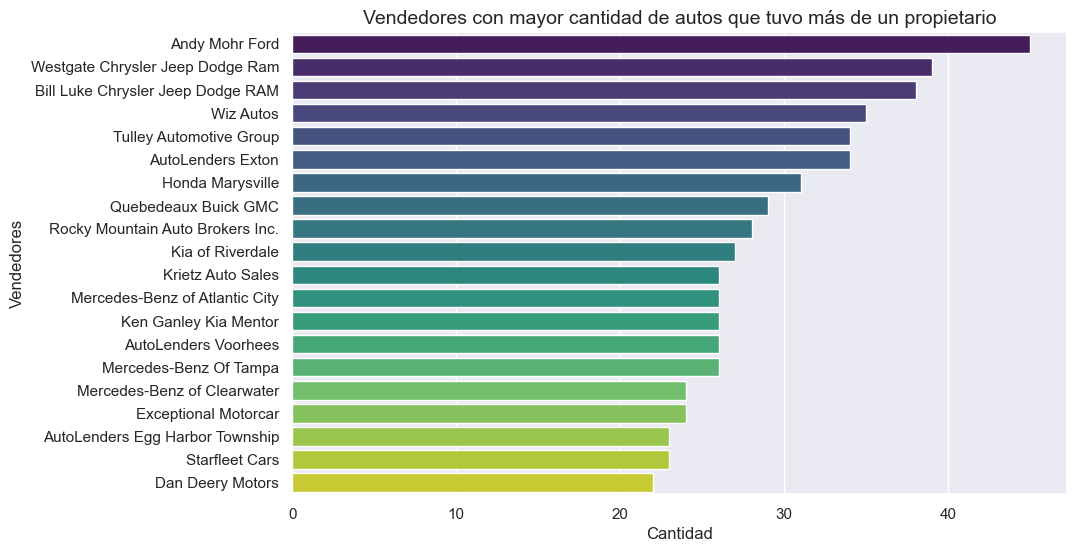

In [154]:
plt.figure(figsize=(10, 6))
autos_danados = data[data["PrimerPrpietario"] == 0]
vendedores_con_danados = autos_danados["Vendedor"].value_counts().head(20)
sns.barplot(x=vendedores_con_danados.values, y=vendedores_con_danados.index, palette="viridis", errorbar=None)
plt.title("Vendedores con mayor cantidad de autos que tuvo más de un propietario", fontsize=14)
plt.xlabel("Cantidad")
plt.ylabel("Vendedores")
plt.show()